In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

In [35]:
allTweets = pd.read_csv('.\data\cleaned_data.csv')

# Positive

In [36]:
text_p=''
for i in allTweets[allTweets['Sentiment']=='Positive']['formatted_text']:
    text_p+=str(i)

In [37]:
word_cloud_p=WordCloud(width=800,height=800,stopwords=set(STOPWORDS),background_color='white',min_font_size=10).generate(text_p)

In [95]:
plt.figure(figsize=(5,5))
plt.imshow(word_cloud_p)
plt.axis('on')
ax3 = plt.gca()
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines['bottom'].set_color('green')
ax3.spines['top'].set_color('green') 
ax3.spines['right'].set_color('green')
ax3.spines['left'].set_color('green')
ax3.title.set_text('Positive')
a=plt.show()

# Neutral

In [65]:
text_n=''
for i in allTweets[allTweets['Sentiment']=='Neutral']['formatted_text']:
    text_n+=str(i)

In [66]:
word_cloud_n=WordCloud(width=800,height=800,stopwords=set(STOPWORDS),background_color='white',min_font_size=10).generate(text_n)

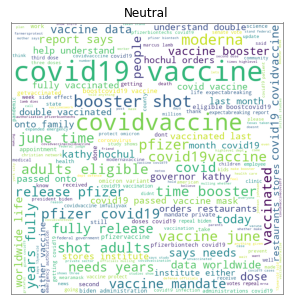

In [96]:
plt.figure(figsize=(5,5))
plt.imshow(word_cloud_n)
plt.axis('on')
ax1 = plt.gca()
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['bottom'].set_color('grey')
ax1.spines['top'].set_color('grey') 
ax1.spines['right'].set_color('grey')
ax1.spines['left'].set_color('grey')
ax1.title.set_text('Neutral')
b=plt.show()

Negative

In [68]:
text_nt=''
for i in allTweets[allTweets['Sentiment']=='Negative']['formatted_text']:
    text_nt+=str(i)

In [69]:
word_cloud_nt=WordCloud(width=800,height=800,stopwords=set(STOPWORDS),background_color='white',min_font_size=10).generate(text_nt)

In [97]:
plt.figure(figsize=(5,5))
plt.imshow(word_cloud_nt)
plt.axis('on')
ax2 = plt.gca()
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['bottom'].set_color('red')
ax2.spines['top'].set_color('red') 
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('red')
ax2.title.set_text('Negative')
c=plt.show()


In [46]:
twitter_mask=np.array(Image.open('twiii.PNG'))

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]], dtype=uint8)

In [47]:
def transform_format(val):
    if val==0:
        return 255
    else:
        return val

In [48]:
transformed_twitter_mask=np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]),np.int32)
for i in range(len(twitter_mask)):
    transformed_twitter_mask[i]=list(map(transform_format,twitter_mask[i]))

In [49]:
wc=WordCloud(background_color="white",mask=transformed_twitter_mask,stopwords=set(STOPWORDS)).generate(text_p)

In [50]:
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 65)

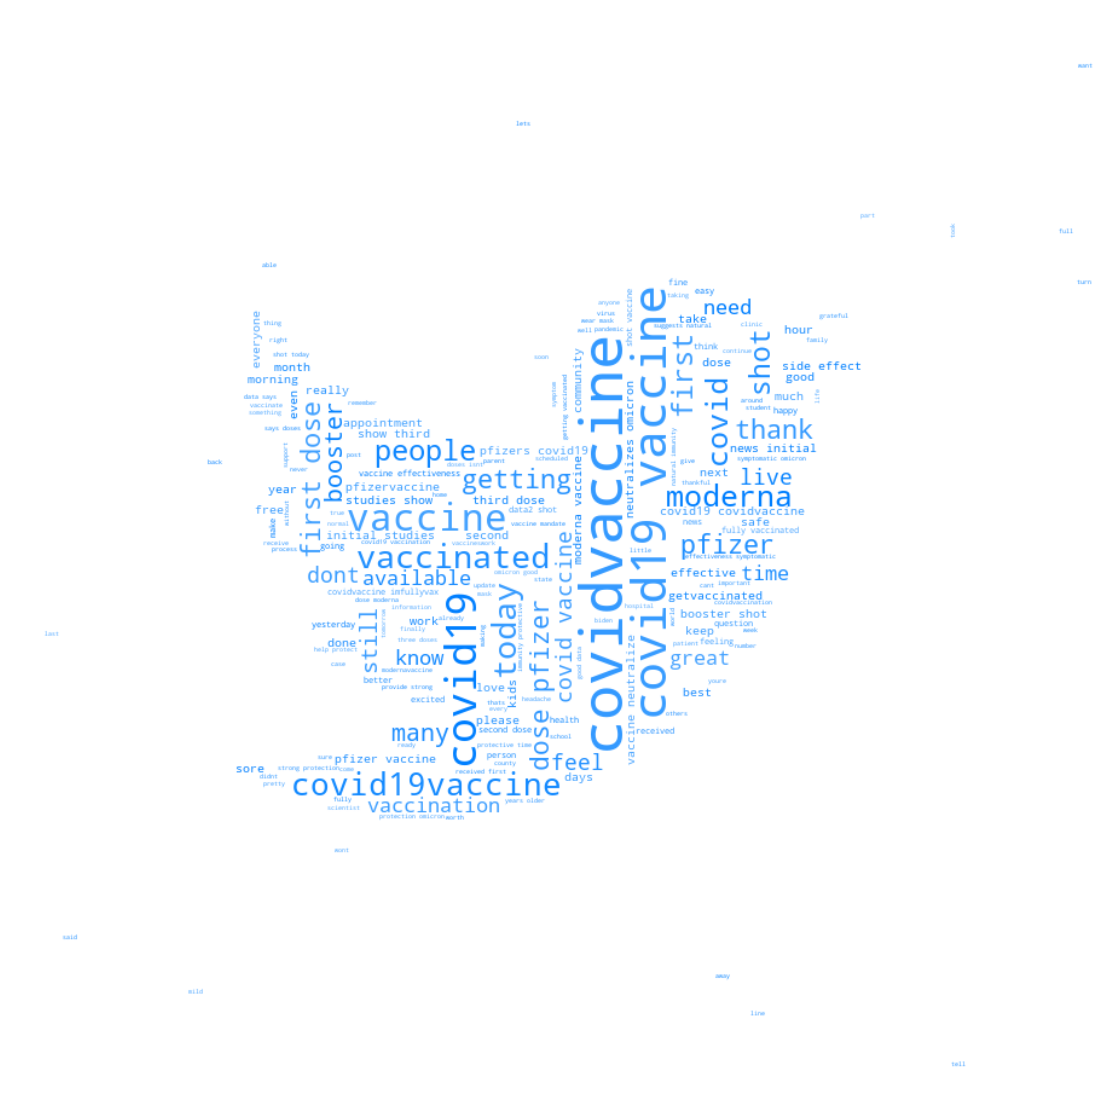

In [51]:
plt.figure(figsize=[20,20])
plt.imshow(wc.recolor(color_func=blue_color_func),interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
allTweets.head(2)

date                                               text  \
0  09-12-2021  Everyone even if vaccinated should watch these...   
1  16-11-2021  @MemHospitalNH Kudos to this dedicated team! 🏆...   

             location  month  \
0   Pennsylvania, USA      9   
1  New Hampshire, USA     11   

                                      formatted_text  polarity  Subjectivity  \
0  everyone even vaccinated watch videos share co...       0.0           0.0   
1                kudos dedicated team covid19vaccine       0.0           0.0   

  Sentiment  
0   Neutral  
1   Neutral

In [53]:
allTweets['month']=allTweets['date'].apply(lambda a:a.split('-')[1])

In [54]:
def fun(val):
    if val=='01':
        return 'Jan'
    elif val=='02':
        return 'Feb'
    elif val=='03':
        return 'Mar'
    elif val== '04':
        return 'Apr'
    elif val=='05':
        return 'May'
    elif val=='06':
        return 'Jun'
    elif val=='07':
        return 'Jul'
    elif val=='08':
        return 'Aug'
    elif val=='09':
        return 'Sep'
    elif val=='10':
        return 'Oct'
    elif val=='11':
        return 'Nov'
    elif val=='12':
        return 'Dec'
    return val


In [55]:
allTweets['month']=allTweets['month'].apply(fun)

In [57]:
allTweets['month'].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [58]:
allTweets[allTweets['month']=='Dec']['formatted_text']

0       everyone even vaccinated watch videos share co...
1311          going booster shot keep yall posted moderna
1312                  booster engage covidbooster moderna
1313    moderna booster claudia like truck last night ...
1314    boosted moderna thanks seamless experience pha...
                              ...                        
6403    probably think know whole covid19 visit today ...
6404    beyond time everyone took vaccine based premis...
6405    pediatrician parent young boys markeita moore ...
6406    promotes vaccine boosters whereas mixandmatch ...
6407    remember skipped grandparents line covid19 vac...
Name: formatted_text, Length: 3258, dtype: object

In [59]:
text=''
for i in allTweets[allTweets['month']=='Dec']['formatted_text']:
    text+=str(i)

In [60]:
text.split()[:2]

['everyone', 'even']

In [61]:
w_c={}
for i in text.split():
    if i not in w_c:
        w_c[i]=1
    else:
        w_c[i]+=1

In [62]:
pd.DataFrame(sorted(w_c.items(),key=lambda a:a[1],reverse=True)[:15],columns=['word','count'])

word  count
0      covid19   1595
1      vaccine   1527
2      booster    373
3       pfizer    308
4         shot    239
5      omicron    200
6         says    189
7        fully    183
8       people    175
9         time    175
10  vaccinated    174
11       years    172
12        dose    167
13     release    160
14        data    156

In [63]:
li=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df=pd.DataFrame(columns=['word','count','month'])
for i in li:
    text=''
    for j in allTweets[allTweets['month']==i]['formatted_text']:
        text+=str(j)
    w_c={}
    for k in text.split():
        if k not in w_c:
            w_c[k]=1
        else:
            w_c[k]+=1
    df1=pd.DataFrame(sorted(w_c.items(),key=lambda a:a[1],reverse=True)[:15],columns=['word','count'])
    df1['month']=i
    print(df1.head(2))
    df=df.append(df1,ignore_index=True)

           word  count month
0  covidvaccine    167   Jan
1       vaccine    126   Jan
           word  count month
0  covidvaccine    105   Feb
1       vaccine     71   Feb
           word  count month
0  covidvaccine    243   Mar
1       vaccine    134   Mar
           word  count month
0  covidvaccine    185   Apr
1       vaccine    114   Apr
           word  count month
0  covidvaccine    100   May
1       covid19     64   May
           word  count month
0  covidvaccine     42   Jun
1       covid19     26   Jun
           word  count month
0  covidvaccine     50   Jul
1       covid19     33   Jul
           word  count month
0  covidvaccine    118   Aug
1       covid19     87   Aug
           word  count month
0  covidvaccine     52   Sep
1       covid19     40   Sep
           word  count month
0  covidvaccine     36   Oct
1       vaccine     29   Oct
             word  count month
0         covid19     43   Nov
1  covid19vaccine     37   Nov
      word  count month
0  covid19   

In [98]:
my_plot=df.hvplot.barh(x='word',y='count',color="#ffcb12",hover_color="grey",groupby='month',flip_yaxis=True, height=500)
my_plot.opts(xrotation=45)

:DynamicMap   [month]
   :Bars   [word]   (count)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
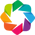

In [101]:
import holoviews as hv
hv.extension('bokeh')
hvplot.save(my_plot, 'top_words.html')
from IPython.display import HTML
#HTML('top_words.html')

In [194]:
colours=["#FFEEE3","#FEE5D5","#FCDCC7","#FBD3B9","#FACAAB","#F9C19D","#F7B88F","#F6B081","#F5A772","#F39E64","#F29556","#F18C48","#F0833A","#EE7A2C","#ED711E"]

In [195]:
import numpy as np

In [197]:
def func(pct,allvalues):
    absolute=int((pct/np.sum(counts_no_urls['count']))*100)
    return "{:.1f}%\n({:d} g)".format(pct,absolute)

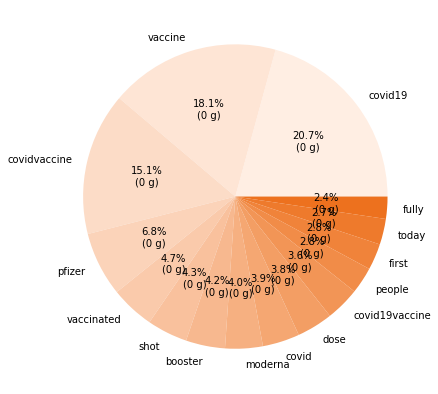

In [198]:
fig=plt.figure(figsize=(10,7))
plt.pie(counts_no_urls['count'],autopct=lambda pct: func(pct,counts_no_urls['count']), labels=counts_no_urls['words'],colors=colours)
plt.show()